<a href="https://colab.research.google.com/github/Catherine-H1/Disaster-Relief-Tweets/blob/main/8_2021_Kaggle_Disaster_Tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI/Tweets NLP/train.csv')

In [ ]:
data.head()
#1 is a real disaster, 0 is not a real disaster

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
len(data)

7613

In [ ]:
data.groupby('target').count()
#There are more than a thousand more examples of non-disaster tweets than disaster tweets. 

,id,keyword,location,text
target,,,,
0,4342,4323,2884,4342
1,3271,3229,2196,3271


In [ ]:
#Defining my input (tweet text) and my output (tweet classification)
X_tweets = data['text'].str.lower()
y_tweets = data['target']

In [ ]:
#First, I will remove any symbols and links from the tweets
import re

X_tweets = X_tweets.apply(lambda x: re.sub(r'http\S+', ' ',x))
X_tweets = X_tweets.apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ',x))

#for tweet in X_tweets:
  #for x in tweet:
    #if x == "co" or x == "http":
      #tweet.remove(x)


#re.sub(r'http\S+', '', stringliteral)
print(X_tweets)
#data = data.apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13 000 people receive wildfires evacuation ord...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609     aria ahrary thetawniest the out of control wi...
7610             m1 94 01 04 utc 5km s of volcano hawaii 
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object


In [ ]:
#Example tweets
for t in data[data['target'] == 0]['text'].head(20).values:
    print (t) 
    

What's up man?
I love fruits
Summer is lovely
My car is so fast
What a goooooooaaaaaal!!!!!!
this is ridiculous....
London is cool ;)
Love skiing
What a wonderful day!
LOOOOOOL
No way...I can't eat that shit
Was in NYC last week!
Love my girlfriend
Cooool :)
Do you like pasta?
The end!
We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
Crying out for more! Set me ablaze
On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.


In [ ]:
#Loading word cloud
import wordcloud
from wordcloud import WordCloud

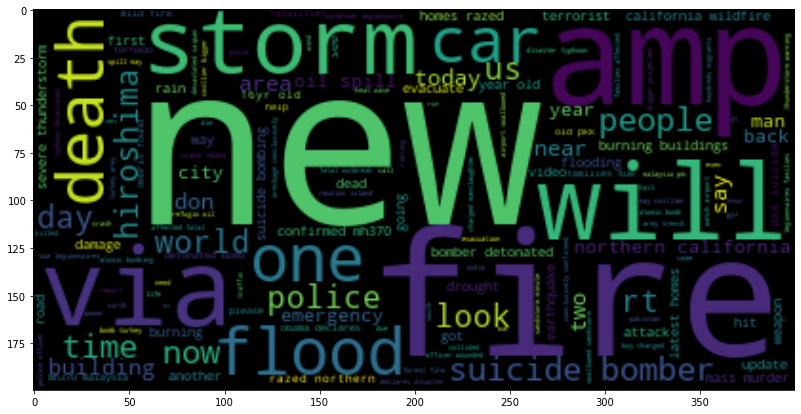

In [ ]:
wordcloud = WordCloud()
non_disaster_text = ""

for i in range(len(X_tweets)):
  if y_tweets[i] == 1:
    non_disaster_text += X_tweets[i] + " "


wordcloud.generate_from_text(non_disaster_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

#New, fire, flood, storm, death, police, car, and suicide bomber are popular words for disaster related tweets.

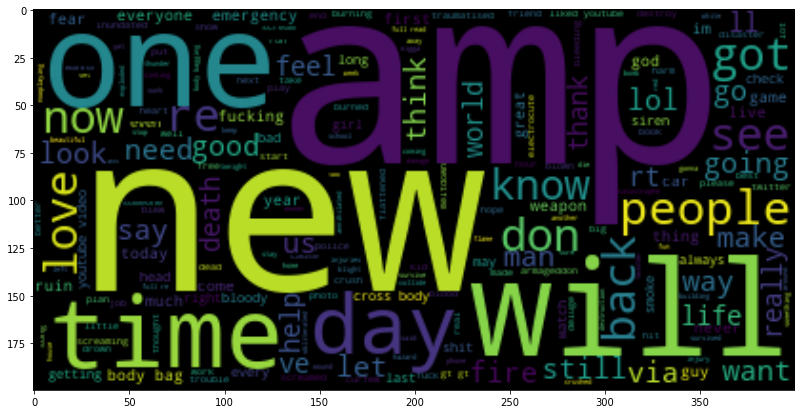

In [ ]:
wordcloud = WordCloud()
non_disaster_text = ""

for i in range(len(X_tweets)):
  if y_tweets[i] == 0:
    non_disaster_text += X_tweets[i] + " "


wordcloud.generate_from_text(non_disaster_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
#lol, love, and people are popular

# **Preparing the data**

**Tokenizing**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
X_tweets = [word_tokenize(x) for x in X_tweets]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
X_tweets

**Removing stopwords**

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwordset = set(stopwords.words('english'))
stopwordset.add('amp')

for tweet in X_tweets:
  for word in tweet:
    if word in stopwordset:
      tweet.remove(word)
print(X_tweets[:3])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['deeds', 'the', 'reason', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us'], ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'], ['residents', 'asked', 'shelter', 'place', 'being', 'notified', 'officers', 'other', 'evacuation', 'shelter', 'place', 'orders', 'expected']]


In [ ]:
stopwordset

In [ ]:
print(X_tweets[:3])

[['deeds', 'the', 'reason', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us'], ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'], ['residents', 'asked', 'shelter', 'place', 'being', 'notified', 'officers', 'other', 'evacuation', 'shelter', 'place', 'orders', 'expected']]


**Stemming and Lemmatization**

In [ ]:
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

for tweet in X_tweets:
  for i in range(len(tweet)):
    tweet[i] = stemmer.stem(tweet[i])
    tweet[i] = lemma.lemmatize(tweet[i])


print(X_tweets[-3:])

[['m1', '94', '01', '04', 'utc', '5km', 'of', 'volcano', 'hawaii'], ['polic', 'investig', 'an', 'e', 'bike', 'collid', 'a', 'car', 'littl', 'portug', 'e', 'bike', 'rider', 'suffer', 'seriou', 'non', 'life', 'threaten', 'injuri'], ['latest', 'home', 'raze', 'northern', 'california', 'wildfir', 'abc', 'news']]


**Word Occurences**

In [ ]:
#https://medium.com/the-programmer/how-does-bag-of-words-tf-idf-works-in-deep-learning-d668d05d281b
#https://towardsdatascience.com/multi-label-classification-using-bag-of-words-bow-and-tf-idf-4f95858740e5

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Creating a dictionary that counts the number of occurences each word has
word_occurences = {}
for tweet in X_tweets:
  for word in tweet:
    if word not in word_occurences:
      word_occurences[word] = 1
    else:
      word_occurences[word] += 1

popular_words = sorted(word_occurences, key=word_occurences.get, reverse=True)
popular_words[:10]

['the', 'a', 'like', 'i', 'fire', 'you', 's', 'get', 't', 'my']

In [ ]:
word_occurences

{'deed': 2,
 'the': 1582,
 'reason': 31,
 'thi': 126,
 'earthquak': 53,
 'may': 89,
 'allah': 9,
 'forgiv': 3,
 'u': 261,
 'forest': 67,
 'fire': 363,
 'near': 58,
 'la': 26,
 'rong': 1,
 'sask': 1,
 'canada': 13,
 'resid': 9,
 'ask': 28,
 'shelter': 7,
 'place': 35,
 'be': 217,
 'notifi': 1,
 'offic': 53,
 'other': 44,
 'evacu': 131,
 'order': 41,
 'expect': 33,
 '13': 22,
 '000': 4,
 'peopl': 201,
 'receiv': 4,
 'wildfir': 82,
 'california': 121,
 'got': 125,
 'sent': 13,
 'photo': 68,
 'rubi': 2,
 'alaska': 8,
 'smoke': 54,
 'pour': 4,
 'a': 906,
 'school': 70,
 'rockyfir': 4,
 'updat': 57,
 'hwi': 10,
 '20': 25,
 'close': 40,
 'both': 11,
 'direct': 18,
 'due': 31,
 'lake': 16,
 'counti': 38,
 'cafir': 2,
 'flood': 169,
 'disast': 161,
 'heavi': 21,
 'rain': 61,
 'caus': 106,
 'flash': 21,
 'street': 32,
 'manit': 1,
 'colorado': 16,
 'spring': 18,
 'area': 59,
 'm': 223,
 'top': 57,
 'hill': 12,
 'i': 394,
 'see': 128,
 'wood': 6,
 's': 323,
 'emerg': 164,
 'happen': 56,
 'in': 13

# **Training the Tweets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_tweets, y_tweets, test_size = 0.2, random_state=1)

In [ ]:
train_tweets = [" ".join(t) for t in X_train]
train_tweets_label = [t for t in y_train]

vectorizer = CountVectorizer()
train_vect = vectorizer.fit_transform(train_tweets)


model = LogisticRegression()
model.fit(train_vect, train_tweets_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Time for the model to predict the categories

test_tweets = [" ".join(t) for t in X_test]

test_vect = vectorizer.transform(test_tweets)
y_pred = model.predict(test_vect)


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))


0.799080761654629


# **Evaluation**

In [ ]:
#Creating a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import multilabel_confusion_matrix


In [ ]:
confusion_matrix(y_test, y_pred)

array([[776, 106],
       [200, 441]])

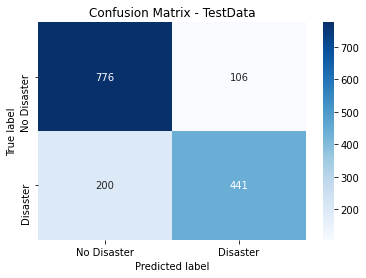

In [ ]:

cm = confusion_matrix(y_test, y_pred)

labels = ['No Disaster', 'Disaster']
#df_cm = pd.DataFrame(cm,index =labels,columns = labels)
df_cm = pd.DataFrame(cm, index=labels, columns= labels)
fig = plt.figure()
res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
#plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
plt.title('Confusion Matrix - TestData')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.close()


In [ ]:
#Let's see what tweets the model guessed incorrectly

table=pd.DataFrame([[" ".join(t) for t in X_test],y_pred, y_test]).transpose()
table.columns = ['Tweet', 'Predicted Category', 'True Category']
#print("Percent Correct: %.2f" % (sum(table['Predicted Category'] == table['True Category'])/len(table['True Category'])))
table

,Tweet,Predicted Category,True Category
0,goulburn man henri van bilsen miss emerg servi...,0,1
1,thing fear in organ fluctuat disturb imbal the...,0,0
2,tsunami esh hey esh,0,0
3,potu until drown water enter lung be aliv caus...,0,0
4,crawl my skin wound will hea,0,1
...,...,...,...
1518,gt gt gidiexclusix shock aba woman deliv facel...,0,0
1519,fevwarrior the screech siren accompani just he...,0,0
1520,in deep sleep dream you re bout fall cliff the...,0,0
1521,disneyirh traumatis im,0,1


In [ ]:
X_test[0]

['goulburn',
 'man',
 'henri',
 'van',
 'bilsen',
 'miss',
 'emerg',
 'servic',
 'search',
 'a',
 'goulburn',
 'man',
 'disappear',
 'hi']

# **I will train it again using another method.**

In [ ]:
#GloVe (This takes the similarity of words into account)
from torchtext.vocab import GloVe
VEC_SIZE = 300
glove = GloVe(name='6B', dim=VEC_SIZE)

# Returns word vector for word if it exists, else return None.
def get_word_vector(word):
    try:
      return glove.vectors[glove.stoi[word.lower()]].numpy()
    except KeyError:
      return None





.vector_cache/glove.6B.zip: 862MB [02:41, 5.35MB/s]                           
100%|█████████▉| 399199/400000 [00:48<00:00, 8096.29it/s]

In [ ]:
def glove_transform_data_descriptions(descriptions):
    X = np.zeros((len(descriptions), VEC_SIZE)) # creates an array with 0s --> [0,0,0,0]
    for i, description in enumerate(descriptions): 
        found_words = 0.0
        #description = description.strip()
        for word in description: 
            vec = get_word_vector(word)
            if vec is not None:
                ### YOUR CODE HERE ###
                # Increment found_words and add vec to X[i].
                found_words += 1
                X[i] += vec
#transforms our entire tweets word by word into glove vectors
                
                ### END CODE HERE ###
        # We divide the sum by the number of words added, so we have the
        # average word vector.
        if found_words > 0:
            X[i] /= found_words
            
    return X
  
glove_train_X = glove_transform_data_descriptions(X_train)
glove_train_y = [label for label in y_train]

glove_test_X = glove_transform_data_descriptions(X_test)
glove_test_y = [label for label in y_test]

In [ ]:
print(glove_train_y[3])

1


In [ ]:
#Using Logistic Regression WITH GloVe

model.fit(glove_train_X, glove_train_y)
y_pred = model.predict(glove_test_X)

print("Accuracy Score:", accuracy_score(y_pred, glove_test_y))
#The accuracy score decreased

Accuracy Score: 0.7852921864740644


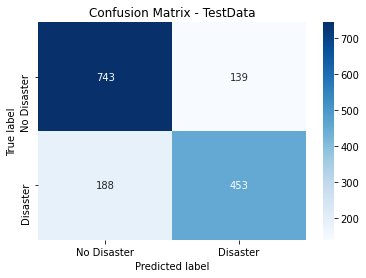

In [ ]:
cm = confusion_matrix(glove_test_y, y_pred)

labels = ['No Disaster', 'Disaster']
#df_cm = pd.DataFrame(cm,index =labels,columns = labels)
df_cm = pd.DataFrame(cm, index=labels, columns= labels)
fig = plt.figure()
res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
#plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
plt.title('Confusion Matrix - TestData')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.close()